# About Dataset

Problem Statement
Your client is an Insurance company and they need your help in building a model to predict whether the policyholder (customer) will pay next premium on time or not. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that you pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a medical insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalized in that year, the insurance provider company will bear the cost of hospitalization etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalization cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalized that year and not everyone. This way everyone shares the risk of everyone else. Just like medical insurance, there is life insurance where every year you pay a premium of certain amount to insurance provider company so that in case of unfortunate event of your death, the insurance provider company will provide a compensation (called ‘sum assured’) to your immediate family. Similarly, there can be a variety of insurance products for different kinds of
risks. As you can imagine, if a large number of customers do not pay the premium on time, it might disrupt the cash flow and smooth operation for the company. A customer may stop making regular premium payments for a variety of reasons - some may forget, some may find it expensive and not worth the value, some may not have money to pay the premium etc.

# Objective of the project
- Predict given the dataset, if a customer or policyholder will pay his/her premium fee the following year
- Perform some EDA to unerstand he independent variables
- Build a model using classification algorithms and also make sure you deploy it.

In [3]:
#importing necessary libraries
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, precision_score
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler


In [4]:
#importing the dataset
train = pd.read_csv('train__health_ins_premium_data.csv')
test = pd.read_csv('test_health_ins_premium_data.csv')
train.shape, test.shape

((79853, 13), (34224, 11))

In [5]:
#siting the list of columns in each dataset
train.columns.to_list()

['id',
 'perc_premium_paid_by_cash_credit',
 'age_in_days',
 'Income',
 'Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score',
 'no_of_premiums_paid',
 'sourcing_channel',
 'residence_area_type',
 'premium',
 'target']

In [6]:
test.columns.to_list()

['id',
 'perc_premium_paid_by_cash_credit',
 'age_in_days',
 'Income',
 'Count_3-6_months_late',
 'Count_6-12_months_late',
 'Count_more_than_12_months_late',
 'application_underwriting_score',
 'no_of_premiums_paid',
 'sourcing_channel',
 'residence_area_type']

In [7]:
#subseting by head to galnce through the dataset
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


# desctiption of  each varibale
- id - Identification number of the customer

- perc_premium_paid_by_cash_credit - This is the percentage of the premium amount paid through cash credit

- age_in_days - age of the customers in numeric format

- income - income of the policyholder or customers

- Count_3-6_months_late - Number of time with 3-6 months late payment

- Count_6-12_months_late - Number of time with 6-12 months late payment

- Count_more_than_12_months_late - Number of time with more than 12 months late payment

- application_underwriting_score - Before an insurance company can accept your application for coverage, 
                                   they analyze your personal, financial, and medical details. Then, they calculate 
                                   the level of risk you present to their business, also known as a risk score. 
                                   This process is called underwriting. Underwriting is the process by which the insurer 
                                   determines whether a consumer is eligible for coverage. The higher the score the better.
                                   Those with high score will pay less premium.

- no_of_premiums_paid - Number of premiums paid

- sourcing_channel - The source through which the insurance policy is sold to the policyholder

- residence_area_type - Residence area where the customer lives

- premium - Amount of money paid by the policyholder for an insurance policy

- target -This is the column that shows whether the customer will pay next premium on time or not, where 0 = NO, and 1 = Yes

# Performing EDA

In [8]:
# Checking for duplicated data
train.duplicated().any(), test.duplicated().any()

(False, False)

In [9]:
#check if there are any missing value
train.isna().sum().any(), test.isna().sum().any()

(True, True)

In [10]:
#check the columns with missing value on the train dataset
train.isna().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

In [11]:
#check the columns with missing value on the test dataset
test.isna().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [12]:
#filling the missing data in all columns using a def function

def missing_value(data):
    """
    Fill in missing values in dataframe.
    
    parameter
    ---------
    data : Dataframe
          
    Returns
    -------
    Dataframe
        The dataframe with no missig values.
    """
    cols = ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score']
    for i in cols:
        fill_data = data[i].fillna(value = data[i].median(), inplace = True)
    return fill_data
missing_value(train)
missing_value(test)
    

In [13]:
train.isna().sum().any(), test.isna().sum().any()

(False, False)

In [14]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [15]:
#summary statistics
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248369,0.078093,0.059935,99.072606,10.863887,10924.507533,0.937397
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691102,0.436251,0.311840,0.726395,5.170687,9401.676542,0.242248
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.830000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.520000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [16]:
test.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
count,34224.000000,34224.000000,34224.000000,3.422400e+04,34224.000000,34224.000000,34224.000000,34224.000000,34224.000000
mean,56739.956376,0.314457,18824.215346,2.028201e+05,0.238517,0.080645,0.058059,99.067623,10.890428
std,32935.402647,0.334059,5246.525604,2.702536e+05,0.685889,0.454435,0.306912,0.728999,5.216867
min,1.000000,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000
25%,28254.750000,0.034000,14972.000000,1.063975e+05,0.000000,0.000000,0.000000,98.830000,7.000000
50%,56488.000000,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000
75%,85386.250000,0.540000,22636.000000,2.500200e+05,0.000000,0.000000,0.000000,99.520000,14.000000
max,114077.000000,1.000000,35785.000000,2.191455e+07,12.000000,10.000000,7.000000,99.890000,59.000000


In [17]:
train.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005643,-0.002117,0.003429,-0.002017,-0.003328,0.003430,-0.005147
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.213011,0.213953,0.167213,-0.138308,-0.152837,-0.067523,-0.241064
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.057874,-0.072439,-0.059114,0.049582,0.176544,0.074070,0.095158
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001296,-0.017292,-0.012341,0.062612,0.079078,0.302825,0.016542
Count_3-6_months_late,-0.005643,0.213011,-0.057874,-0.001296,1.000000,0.204286,0.296139,-0.083875,0.076435,-0.000819,-0.246427
Count_6-12_months_late,-0.002117,0.213953,-0.072439,-0.017292,0.204286,1.000000,0.266337,0.005090,-0.092593,-0.043642,-0.283998
Count_more_than_12_months_late,0.003429,0.167213,-0.059114,-0.012341,0.296139,0.266337,1.000000,-0.032233,-0.021409,-0.023462,-0.238450
application_underwriting_score,-0.002017,-0.138308,0.049582,0.062612,-0.083875,0.005090,-0.032233,1.000000,-0.269273,0.131042,0.067129
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.076435,-0.092593,-0.021409,-0.269273,1.000000,0.191889,0.022741
premium,0.003430,-0.067523,0.074070,0.302825,-0.000819,-0.043642,-0.023462,0.131042,0.191889,1.000000,0.036420


In [18]:
test.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid
id,1.000000,-0.007210,0.004833,-0.003724,0.005055,0.003159,0.001179,-0.002782,-0.003345
perc_premium_paid_by_cash_credit,-0.007210,1.000000,-0.248261,-0.046983,0.213778,0.216918,0.164702,-0.141876,-0.155263
age_in_days,0.004833,-0.248261,1.000000,0.052833,-0.052100,-0.067834,-0.054334,0.040634,0.172958
Income,-0.003724,-0.046983,0.052833,1.000000,-0.000322,-0.030315,-0.002955,0.102614,0.129228
Count_3-6_months_late,0.005055,0.213778,-0.052100,-0.000322,1.000000,0.205183,0.275682,-0.093243,0.077166
Count_6-12_months_late,0.003159,0.216918,-0.067834,-0.030315,0.205183,1.000000,0.300590,-0.010218,-0.084288
Count_more_than_12_months_late,0.001179,0.164702,-0.054334,-0.002955,0.275682,0.300590,1.000000,-0.036073,-0.016010
application_underwriting_score,-0.002782,-0.141876,0.040634,0.102614,-0.093243,-0.010218,-0.036073,1.000000,-0.274278
no_of_premiums_paid,-0.003345,-0.155263,0.172958,0.129228,0.077166,-0.084288,-0.016010,-0.274278,1.000000


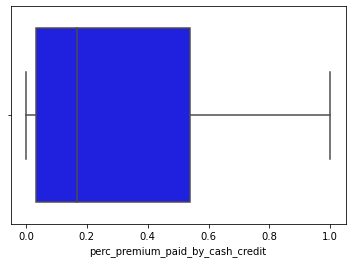

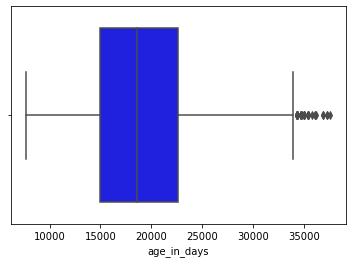

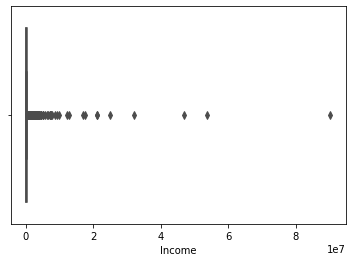

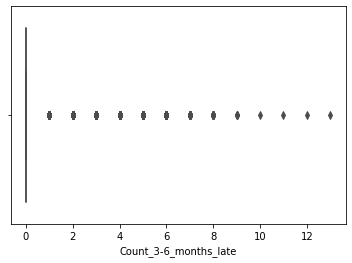

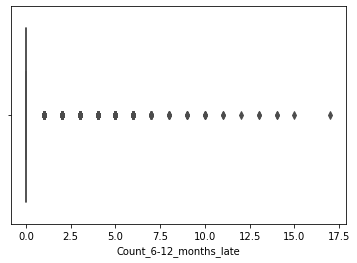

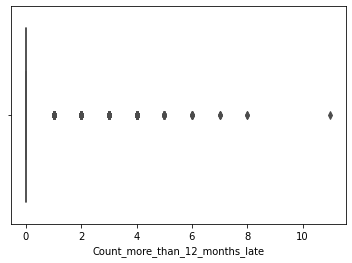

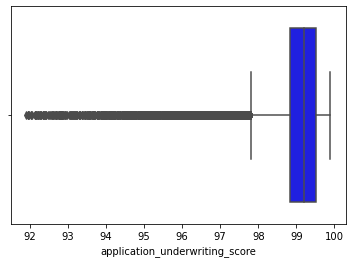

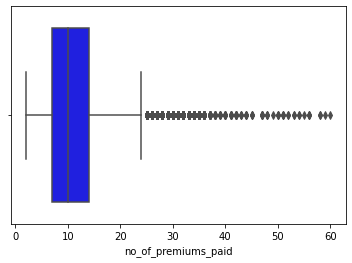

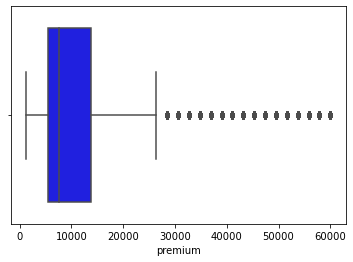

<AxesSubplot:xlabel='premium'>

In [19]:
#checking for outliers in the numeric columns
def viz_outlier(data):
    """
    Visualizing outliers in integer columns.
    
    parameter
    ---------
    data : Dataframe
          
    Returns
    -------
    Plot
        Plot of outliers in the integer columns.
    """
    cols = ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late',
            'Count_6-12_months_late',  'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'premium']
    for i in cols:
        out_plot = sns.boxplot(x = i, data = data, color = "Blue")
        plt.show()
    return out_plot
viz_outlier(train)    

        

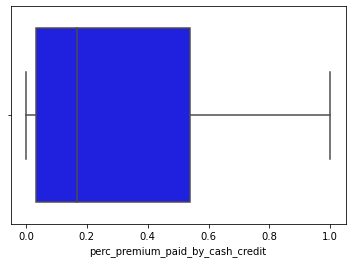

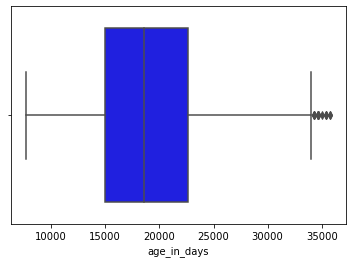

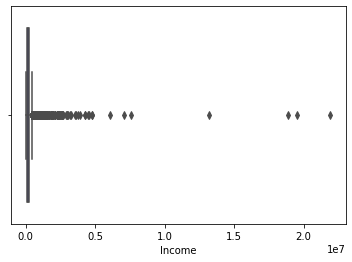

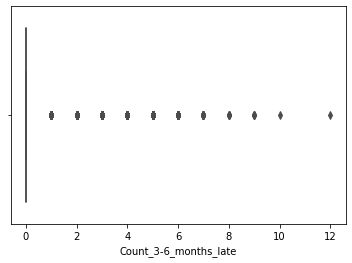

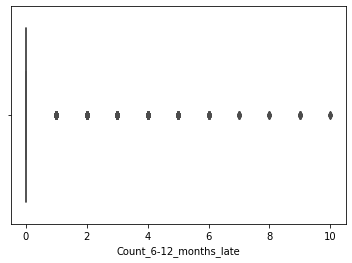

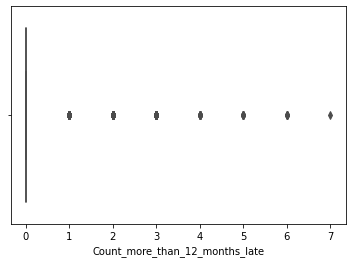

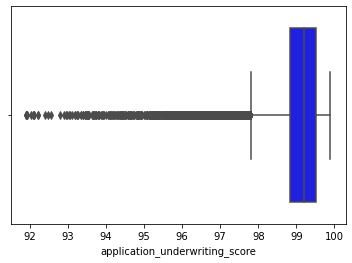

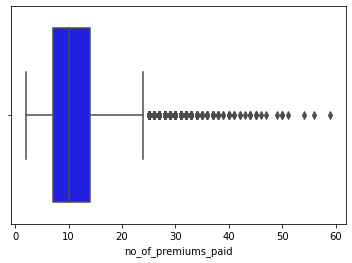

ValueError: Could not interpret input 'premium'

In [20]:
#detect outlier for the test data
viz_outlier(test)

In [23]:
#filling the outlier using iqr
def fill_outlier(df):
    """
    Filling outliers in integer columns.
    
    parameter
    ---------
    data : Dataframe
          
    Returns
    -------
    Series
        Series with no outliers.
    """
    cols = ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late',
            'Count_6-12_months_late',  'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'premium']
    
    for i in df[cols]:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - (1.5 * iqr)
        upper_limit = q3 + (1.5 * iqr)
        
        df[i] = np.where(df[i] > upper_limit, upper_limit, np.where(df[i] < lower_limit, lower_limit, df[i]))
        
    return df[i]
fill_outlier(train)

0         3300.0
1        18000.0
2         3300.0
3         9600.0
4         9600.0
          ...   
79848    13800.0
79849    26400.0
79850     9600.0
79851     5700.0
79852     9600.0
Name: premium, Length: 79853, dtype: float64

In [24]:
#filling the outlier using iqr
def fill_outlier1(df1):
    """
    Filling outliers in integer columns.
    
    parameter
    ---------
    data : Dataframe
          
    Returns
    -------
    Series
        Series with no outliers.
    """
    cols1 = ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late',
            'Count_6-12_months_late',  'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid']
    
    for j in df1[cols1]:
        test_q1 = df1[j].quantile(0.25)
        test_q3 = df1[j].quantile(0.75)
        test_iqr = test_q3 - test_q1
        test_lower_limit = test_q1 - (1.5 * test_iqr)
        test_upper_limit = test_q3 + (1.5 * test_iqr)
        
        df1[j] = np.where(df1[j] > test_upper_limit, test_upper_limit, np.where(df1[j] < test_lower_limit, test_lower_limit, 
                                                                                df1[j]))
        
    return df1[j]
fill_outlier1(test)

0         7.0
1        19.0
2         2.0
3        11.0
4        14.0
         ... 
34219     9.0
34220     7.0
34221    14.0
34222    10.0
34223    11.0
Name: no_of_premiums_paid, Length: 34224, dtype: float64

In [25]:
#feature engineering
#creating column for the premium paid through cash credit
train['premium_paid_by_cash_credit'] = train['perc_premium_paid_by_cash_credit'] * train['premium']
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,premium_paid_by_cash_credit
0,110936,0.429,12058.0,355060.0,0.0,0.0,0.0,99.02,13.0,C,Urban,3300.0,1,1415.7
1,41492,0.010,21546.0,315150.0,0.0,0.0,0.0,99.89,21.0,A,Urban,18000.0,1,180.0
2,31300,0.917,17531.0,84140.0,0.0,0.0,0.0,98.69,7.0,C,Rural,3300.0,0,3026.1
3,19415,0.049,15341.0,250510.0,0.0,0.0,0.0,99.57,9.0,A,Urban,9600.0,1,470.4
4,99379,0.052,31400.0,198680.0,0.0,0.0,0.0,99.87,12.0,B,Urban,9600.0,1,499.2


In [26]:
#converting the age column 
train['age_in_days'] = round(train['age_in_days'] / 365, 0).astype('int')
test['age_in_days'] = round(test['age_in_days'] / 365, 0).astype('int')

In [27]:
train['premium_paid_by_just_cash'] = train['premium'] - train['premium_paid_by_cash_credit']
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,premium_paid_by_cash_credit,premium_paid_by_just_cash
0,110936,0.429,33,355060.0,0.0,0.0,0.0,99.02,13.0,C,Urban,3300.0,1,1415.7,1884.3
1,41492,0.010,59,315150.0,0.0,0.0,0.0,99.89,21.0,A,Urban,18000.0,1,180.0,17820.0
2,31300,0.917,48,84140.0,0.0,0.0,0.0,98.69,7.0,C,Rural,3300.0,0,3026.1,273.9
3,19415,0.049,42,250510.0,0.0,0.0,0.0,99.57,9.0,A,Urban,9600.0,1,470.4,9129.6
4,99379,0.052,86,198680.0,0.0,0.0,0.0,99.87,12.0,B,Urban,9600.0,1,499.2,9100.8


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


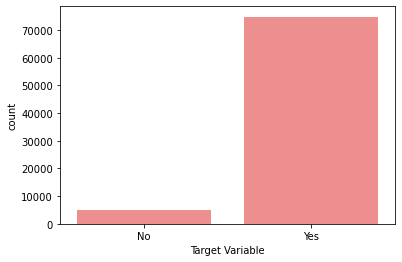

In [28]:
#evaluate the distribution of the target variable
sns.countplot('target', data = train, color = 'Red', alpha = 0.5)
plt.ylabel('count')
plt.xlabel('Target Variable')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

- Note we have an imbalance target data. Therefore the best way to solve this is either by oversampling or undersampling.

* Undersampling - This technique is used to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. Doing this will make us lost a lot of dataset.

* Oversampling - This technique is used to balance uneven datasets by keeping all of the data in the majority class and increaing the size of the minority class.

# Model Development

In [29]:
# Splitting the data into feature and target variables
X = train.drop(columns = ['id', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late',
                           'premium_paid_by_cash_credit', 'premium', 'premium_paid_by_just_cash', 'target'], axis = 1)
y = train['target']
X.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,0.429,33,355060.0,99.02,13.0,C,Urban
1,0.010,59,315150.0,99.89,21.0,A,Urban
2,0.917,48,84140.0,98.69,7.0,C,Rural
3,0.049,42,250510.0,99.57,9.0,A,Urban
4,0.052,86,198680.0,99.87,12.0,B,Urban


In [30]:
# Oversampling the dataset to avoid imbalanace target variable
over = RandomOverSampler(random_state = 42)
X_ovr, y_ovr = over.fit_resample(X, y)
X_ovr.shape, y_ovr.shape

((149708, 7), (149708,))

In [31]:
#splitting the model into validation and train dataset
X_train, X_val, y_train, y_val = train_test_split(X_ovr, y_ovr, test_size = 0.3, random_state = 43, stratify = y_ovr) 

In [32]:
# Instantiating Knn model
knn_model = make_pipeline(OneHotEncoder(use_cat_names=True), StandardScaler(),
                    KNeighborsClassifier(n_neighbors= 2))
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_val)
knn_score = accuracy_score(y_val, knn_pred)
knn_score

0.9286620800213746

In [33]:
# Getting the confusion matrix of knn model
knn_cm = confusion_matrix(y_val, knn_pred, labels = knn_model.classes_)
knn_cm

array([[22457,     0],
       [ 3204, 19252]], dtype=int64)

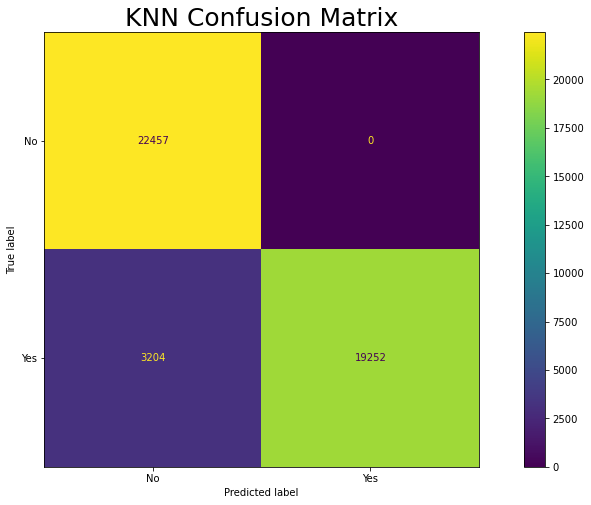

In [34]:
# Plotting Confusion matrix of the knn model
conf_knn = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels = ["No", "Yes"])
fig, ax = plt.subplots(figsize = (16, 8))
conf_knn.plot(ax=ax)
plt.title("KNN Confusion Matrix", size = 25);

In [35]:
# Instantiating decision tree model
tree = make_pipeline(OneHotEncoder(use_cat_names=True), StandardScaler(),
                 DecisionTreeClassifier())
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_val)
score = accuracy_score(y_val, tree_pred)
score

0.9608131276022532

In [36]:
# Getting decision tree model confusion matrix
tree_cm = confusion_matrix(y_val, tree_pred, labels = knn_model.classes_)
tree_cm

array([[22457,     0],
       [ 1760, 20696]], dtype=int64)

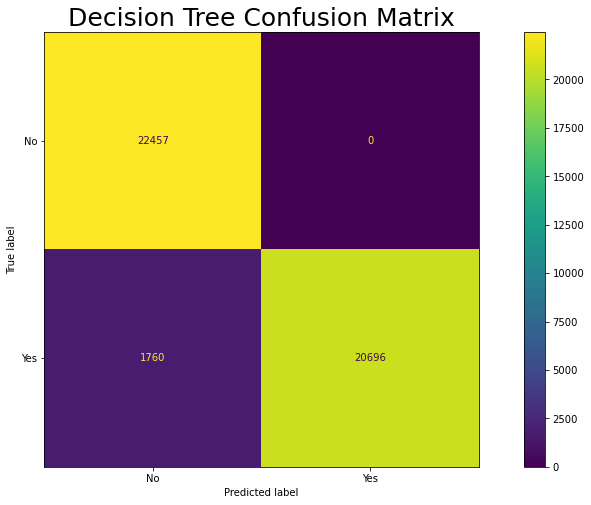

In [37]:
# Plotting Confusion matrix of the model
conf_tree = ConfusionMatrixDisplay(confusion_matrix=tree_cm, display_labels = ["No", "Yes"])
fig, ax = plt.subplots(figsize = (16, 8))
conf_tree.plot(ax=ax)
plt.title("Decision Tree Confusion Matrix", size = 25);

## Since the decision tree model performed better than the knn model, I will be using the former model to oredict the test data and also this is the model I will deploy.

In [38]:
# Dropping unnecessary columns from the test data
test = test.drop(columns = ['id', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1)

In [40]:
#Usung decision tree model to predict the test data
test_pred = tree.predict(test)
test_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)